In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# Load all packages used
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import mypackage

plt.style.use('ggplot')
# plt.style.use('seaborn-white')

TensorFlow version is 2.1.0


# Start with inspecting the data with no transform

In [2]:
X, Y, info = mypackage.Dataset.load("../data/tomra", only_one_contaminant_type=False)
index = np.array([928, 932, 935, 939, 942, 946, 950, 953, 957, 960, 964, 968, 971, 975, 978, 982, 986, 989, 993, 997, 1000, 1004, 1007, 1011, 1015, 1018, 1022, 1025, 1029, 1033, 1036, 1040, 1043, 1047, 1051, 1054, 1058, 1061, 1065, 1069, 1072, 1076, 1079, 1083, 1087, 1090, 1094, 1097, 1101, 1105, 1108, 1112, 1115, 1119, 1123, 1126, 1130, 1134, 1137, 1141, 1144, 1148, 1152, 1155, 1159, 1162, 1166, 1170, 1173, 1177, 1180, 1184, 1188, 1191, 1195, 1198, 1202, 1206, 1209, 1213, 1216, 1220, 1224, 1227, 1231, 1234, 1238, 1242, 1245, 1249, 1252, 1256, 1260, 1263, 1267, 1271, 1274, 1278, 1281, 1285, 1289, 1292, 1296, 1299, 1303, 1307, 1310, 1314, 1317, 1321, 1325, 1328, 1332, 1335, 1339, 1343, 1346, 1350, 1353, 1357, 1361, 1364, 1368, 1371, 1375, 1379, 1382, 1386, 1390, 1393, 1397, 1400, 1404, 1408, 1411, 1415, 1418, 1422, 1426, 1429, 1433, 1436, 1440, 1444, 1447, 1451, 1454, 1458, 1462, 1465, 1469, 1472, 1476, 1480, 1483, 1487, 1490, 1494, 1498, 1501, 1505, 1508, 1512, 1516, 1519, 1523, 1527, 1530, 1534, 1537, 1541, 1545, 1548, 1552, 1555, 1559, 1563, 1566, 1570, 1573, 1577, 1581, 1584, 1588, 1591, 1595, 1599, 1602, 1606, 1609, 1613, 1617, 1620, 1624, 1627, 1631, 1635, 1638, 1642, 1645, 1649, 1653, 1656, 1660, 1664, 1667, 1671, 1674])
print(X.shape, Y.shape)

(34, 100, 100, 208) (34, 100, 100, 1)


The image inspected has three plastic contaminants. The contaminants ara white distinct button, thin blue plastic band and two dark-blue pieces.
The image name is '20200213_120044_FM_fillet_repeat_sample_B_32' a.k.a. '20200213_120044_VariousPlastics_32.jpg'
![VariousPlastics 32](../data/TomraData/Photos/20200213_120044_VariousPlastics_32.jpg)

<IPython.core.display.Javascript object>


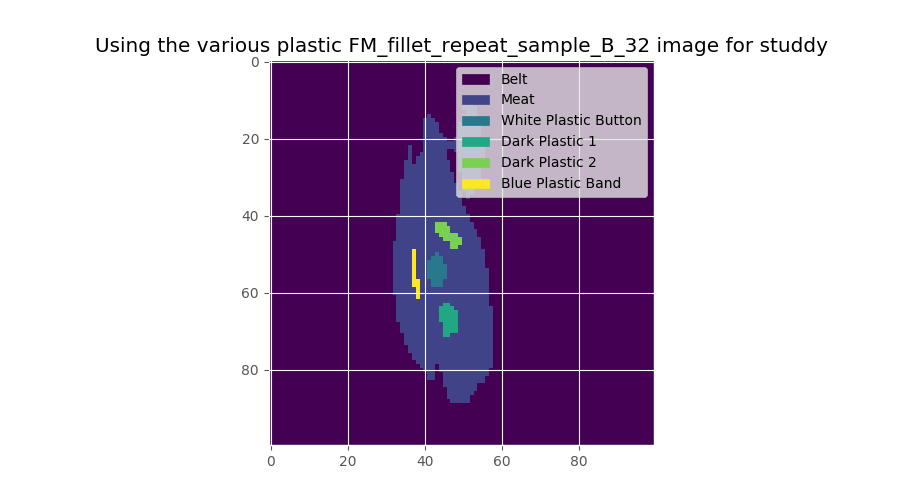

In [103]:
for idx, file_name in enumerate(info):
    if file_name == '20200213_120044_FM_fillet_repeat_sample_B_32':
        image_numb = idx
        
band = 6 # 

plt.figure(figsize=(9, 5))
plt.title(f"Using the various plastic {info[image_numb][16:]} image for studdy")
# plt.imshow(np.squeeze(X[0, :, :, band]));

y = np.squeeze(Y[image_numb])
im = plt.imshow(y)
# https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
values = np.unique(y)
colors = [ im.cmap(im.norm(value)) for value in values]
items = ['Belt', 'Meat', 'White Plastic Button', 'Dark Plastic 1', 'Dark Plastic 2', 'Blue Plastic Band']
patches = [ mpatches.Patch(color=colors[i-1], label=f"{items[i-1]}") for i in values ]
plt.legend(handles=patches)

plt.show()

<IPython.core.display.Javascript object>


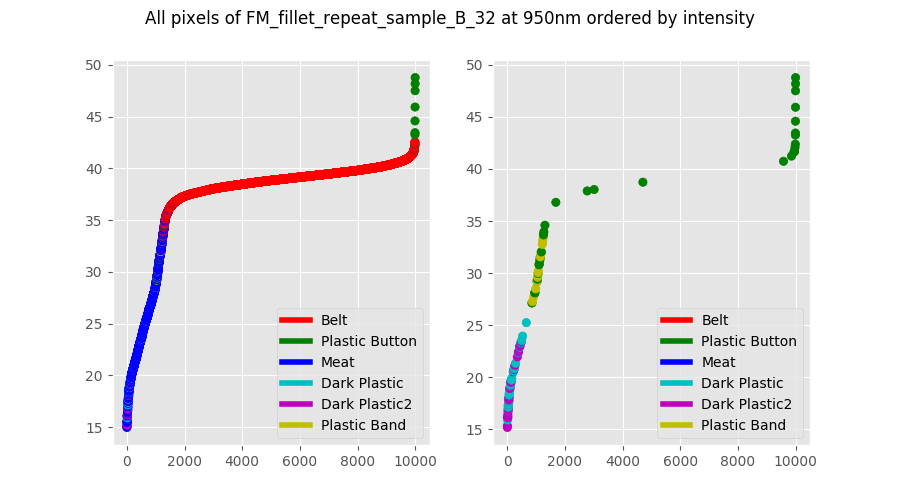

In [105]:

df = pd.DataFrame(data=np.array([X[image_numb,:,:,band].flatten(), Y[image_numb,:,:].flatten()]).T, columns=['X', 'Y'])
df.sort_values(by=['X'], inplace=True)
df.index = range(len(df))

fig = plt.figure(figsize=(9, 5))
fig.suptitle(f"All pixels of {info[image_numb][16:]} at {index[band]}nm ordered by intensity")
ax = plt.subplot(1, 2, 1)
colors = {1:'r', 2:'b', 3:'g', 4:'c', 5:'m', 6:'y'}
ax.scatter(df.index, df['X'], c=df['Y'].apply(lambda x: colors[x]))
ax.legend([Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='Green', lw=4),
           Line2D([0], [0], color='Blue', lw=4),
           Line2D([0], [0], color='c', lw=4),
           Line2D([0], [0], color='m', lw=4),
           Line2D([0], [0], color='y', lw=4)], ['Belt', 'Plastic Button', 'Meat', 'Dark Plastic', 'Dark Plastic2', 'Plastic Band']);
ax = plt.subplot(1, 2, 2)
df_plastic = df[df['Y'] >= 3]
ax.scatter(df_plastic.index, df_plastic['X'], c=df_plastic['Y'].apply(lambda x: colors[x]))
ax.legend([Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='Green', lw=4),
           Line2D([0], [0], color='Blue', lw=4),
           Line2D([0], [0], color='c', lw=4),
           Line2D([0], [0], color='m', lw=4),
           Line2D([0], [0], color='y', lw=4)], ['Belt', 'Plastic Button', 'Meat', 'Dark Plastic', 'Dark Plastic2', 'Plastic Band']);
plt.show()

<IPython.core.display.Javascript object>


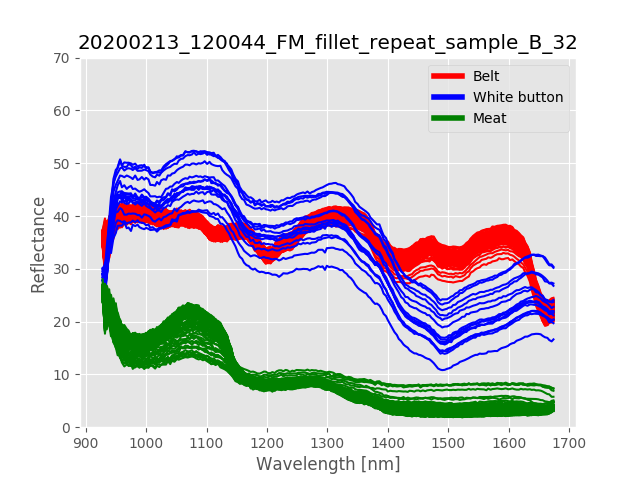

In [106]:
# Plot all in y=40:60, x=60:80 (Belt), y=52:57, x=42:44 (Plastic), y=65:76, x=47:55 (Meat)
fileIndex = 0
data = X[fileIndex]
belt = data[40:61, 60:81, :]
plastic = data[52:57, 42:45, :]
meat = data[65:77, 47:56, :]

def add_all_pixels_to_plot(data, color):
    to_plot = np.reshape(data, (-1, 208))
    n, m = to_plot.shape
    for i in range(n):
        plt.plot(index, to_plot[i, :], color)

fig = plt.figure()
plt.title(info[fileIndex])
add_all_pixels_to_plot(belt, color='r')
add_all_pixels_to_plot(plastic, color='b')
add_all_pixels_to_plot(meat, color='g')
plt.ylim(0, 70)
plt.ylabel("Reflectance")
plt.xlabel("Wavelength [nm]")

ax = fig.axes[0]
ax.legend([Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='Blue', lw=4),
           Line2D([0], [0], color='Green', lw=4)], ['Belt', 'White button', 'Meat']);


# Now try out different scaling transformations

In [10]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

def load_data():
    X, Y, info = mypackage.Dataset.load("../data/tomra")
    X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)
    X_test, X_train = mypackage.Dataset.scale(X_test, X_train, scale='GlobalStandardization')
    return X_train, X_test, Y_train, Y_test

### PCA

<IPython.core.display.Javascript object>


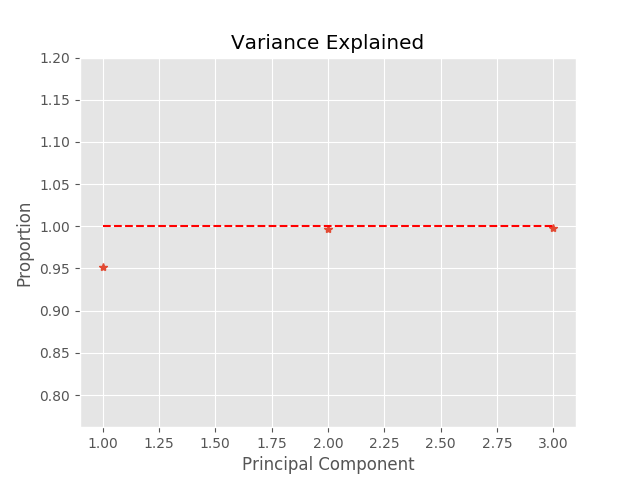

<IPython.core.display.Javascript object>


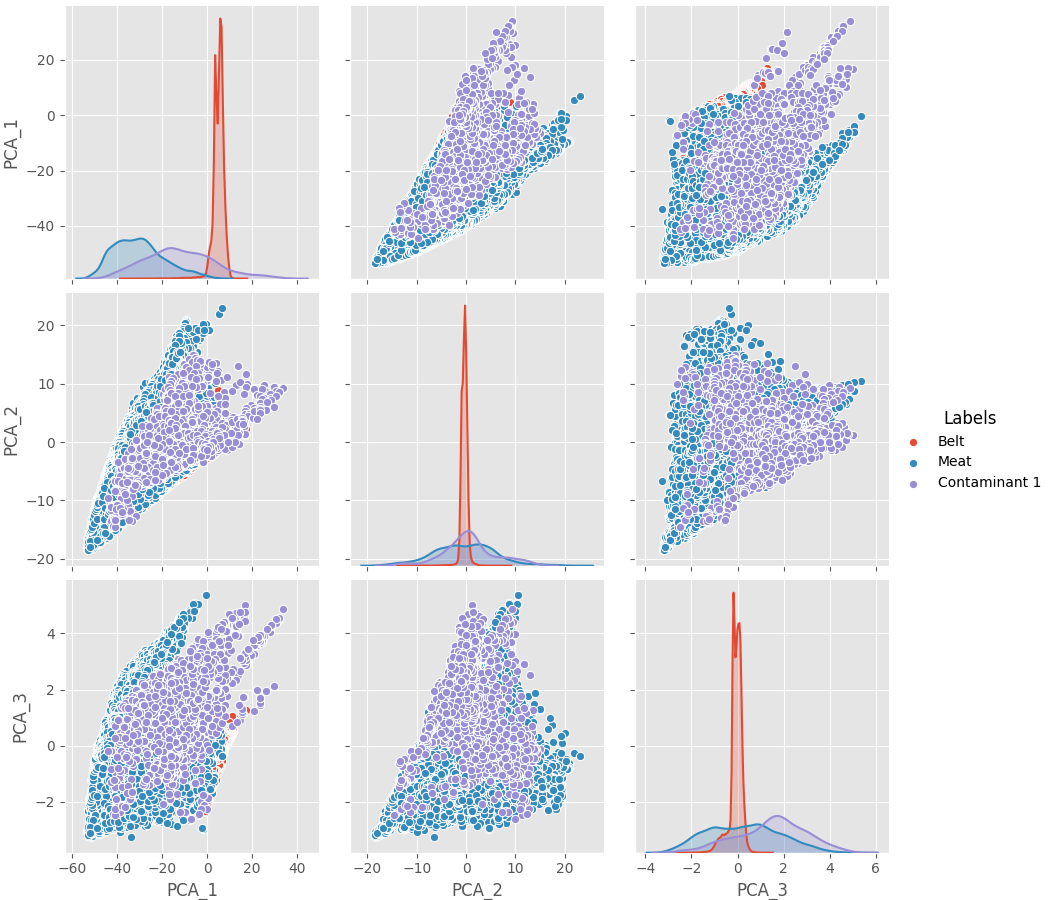

In [11]:
# With scaling
X_train, X_test, Y_train, Y_test = load_data()

_, X_pca = mypackage.Dataset.PCA(X_train[:, :, :, 10:-10], X_test[:, :, :, 10:-10], n_components=3, plot=True)

n_items, n, m, k = X_pca.shape
df = pd.DataFrame(X_pca.reshape((n_items*n*m, k)), columns=['PCA_1', 'PCA_2', 'PCA_3'])
df['Labels'] = Y_test.reshape((n_items*n*m, 1)).copy()
items = ['Belt', 'Meat', 'Contaminant 1', 'Contaminant 2', 'Contaminant 3', 'Contaminant 4']
for i, item in enumerate(items):
    df['Labels'][df['Labels'] == i+1] = item
sns.pairplot(df, hue='Labels', height=3)
plt.show()

<IPython.core.display.Javascript object>


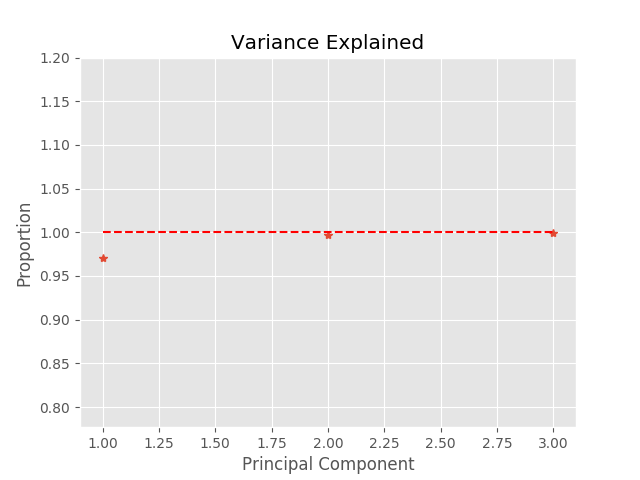

<IPython.core.display.Javascript object>


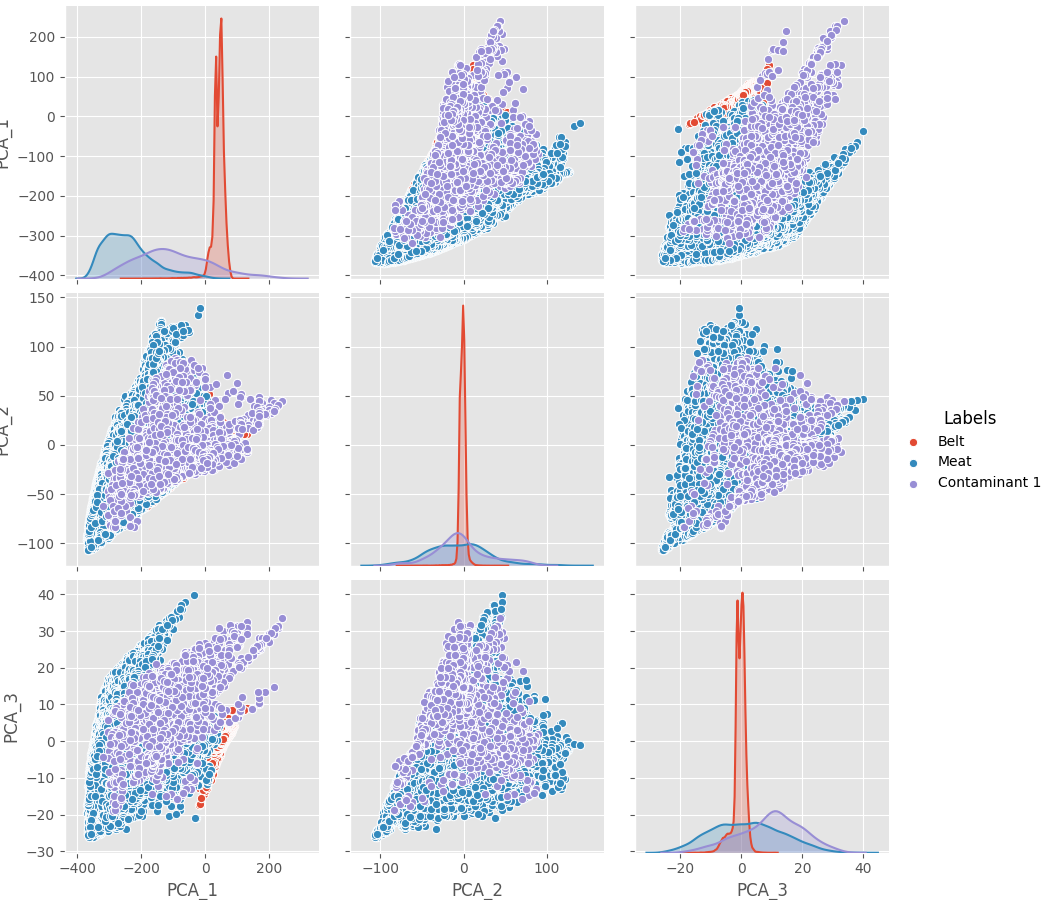

In [9]:
# No scaling
X_train, X_test, Y_train, Y_test = load_data()

_, X_pca = mypackage.Dataset.PCA(X_train[:, :, :, 10:-10], X_test[:, :, :, 10:-10], n_components=3, plot=True)

n_items, n, m, k = X_pca.shape
df = pd.DataFrame(X_pca.reshape((n_items*n*m, k)), columns=['PCA_1', 'PCA_2', 'PCA_3'])
df['Labels'] = Y_test.reshape((n_items*n*m, 1)).copy()
items = ['Belt', 'Meat', 'Contaminant 1', 'Contaminant 2', 'Contaminant 3', 'Contaminant 4']
for i, item in enumerate(items):
    df['Labels'][df['Labels'] == i+1] = item
sns.pairplot(df, hue='Labels', height=3)
plt.show()

### LDA

<IPython.core.display.Javascript object>


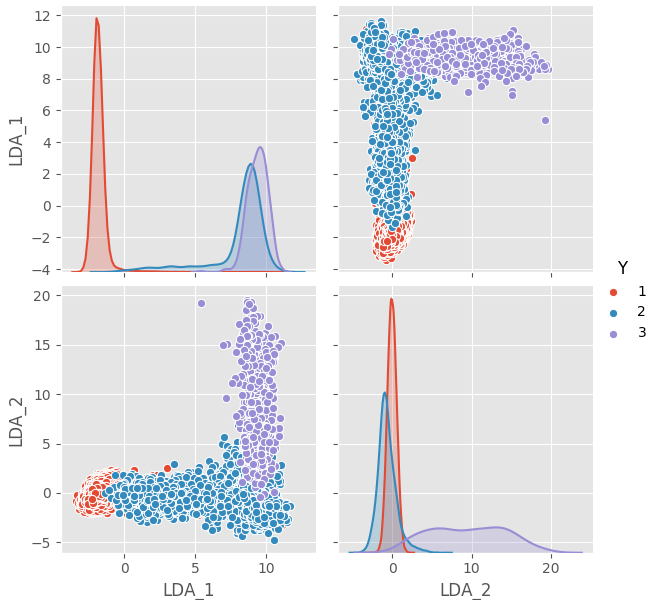

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
n_components = 2
lda = LinearDiscriminantAnalysis(n_components=n_components)

train = mypackage.StackTransform(X_train, Y_train)
lda.fit(train.X_stack(), train.Y_stack().ravel())

test = mypackage.StackTransform(X_test)
X_lda = lda.transform(test.X_stack())
X_lda_unstacked = X_lda
X_lda = test.Unstack(X_lda, k=n_components)

print(X_lda.shape, Y_test.shape)

n_items, n, m, k = X_lda.shape
df = pd.DataFrame(X_lda.reshape((n_items*n*m, k)), columns=['LDA_1', 'LDA_2'])
df['Y'] = Y_test.reshape((n_items*n*m, 1))
sns.pairplot(df, hue='Y', height=3)
plt.show()

This LDA result indicates that the belt is easily distinguisable from the rest. The meat vs plastic is more tricky. This might maybe, be improved if the fat would be labeled and then 3 LDA classes could be used.

## Now try out with the first derivative

In [110]:
X, Y, info = mypackage.Dataset.load("../data/tomra")
X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)

X_test, X_train = mypackage.Dataset.scale(X_test, X_train, scale='RemoveTrend')
# X_test, X_train = mypackage.Dataset.scale(X_test, X_train, scale='FirstDerivative')

# https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

The savgol_filter function is nicely explained here: https://nirpyresearch.com/savitzky-golay-smoothing-method/

<IPython.core.display.Javascript object>


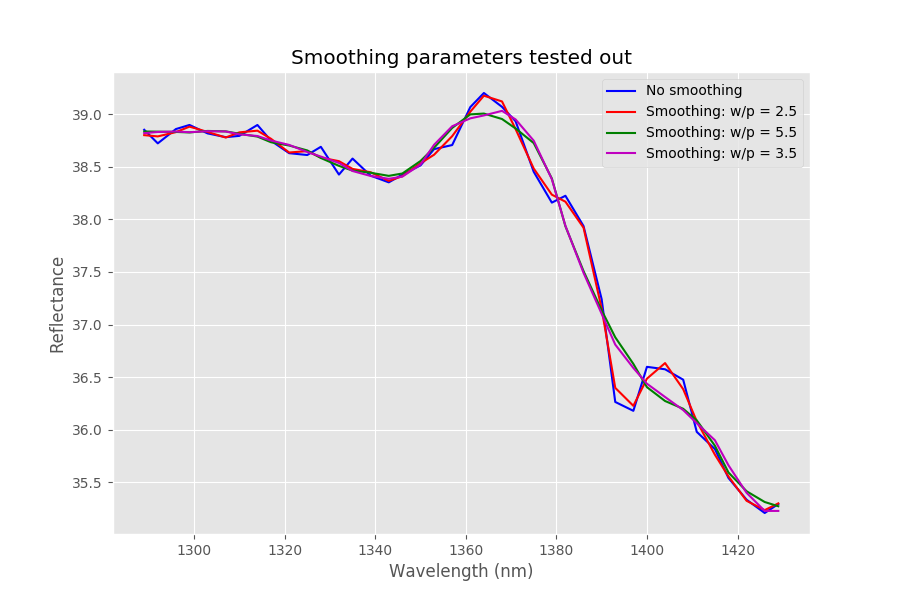

In [111]:
from scipy.signal import savgol_filter

for idx, fileName in enumerate(info):
    if fileName == '20200213_114148_fillet_sample39':
        break
image_used = idx

w = 5
p = 2
film=(57, 44)
x, y= film
interval = np.arange(100,140,1)
X_original = X[image_used, y, x, :]
X_smooth_1 = savgol_filter(X_original, w, polyorder = p, deriv=0)
X_smooth_2 = savgol_filter(X_original, 2*w+1, polyorder = p, deriv=0)
X_smooth_3 = savgol_filter(X_original, 4*w+1, polyorder = 3*p, deriv=0)

plt.figure(figsize=(9,6))
plt.title("Smoothing parameters tested out")
plt.plot(index[interval], X_original[interval], 'b', label = 'No smoothing')
plt.plot(index[interval], X_smooth_1[interval], 'r', label = 'Smoothing: w/p = 2.5')
plt.plot(index[interval], X_smooth_2[interval], 'g', label = 'Smoothing: w/p = 5.5')
plt.plot(index[interval], X_smooth_3[interval], 'm', label = 'Smoothing: w/p = 3.5')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend();


The blue line is the original spectrum. The red line is a mild smoothing with $w/p = 2.5$ $w/p=2.5$, the green line represents a more aggressive smoothing and the magenta line is a more optimal choice of parameters.

<IPython.core.display.Javascript object>


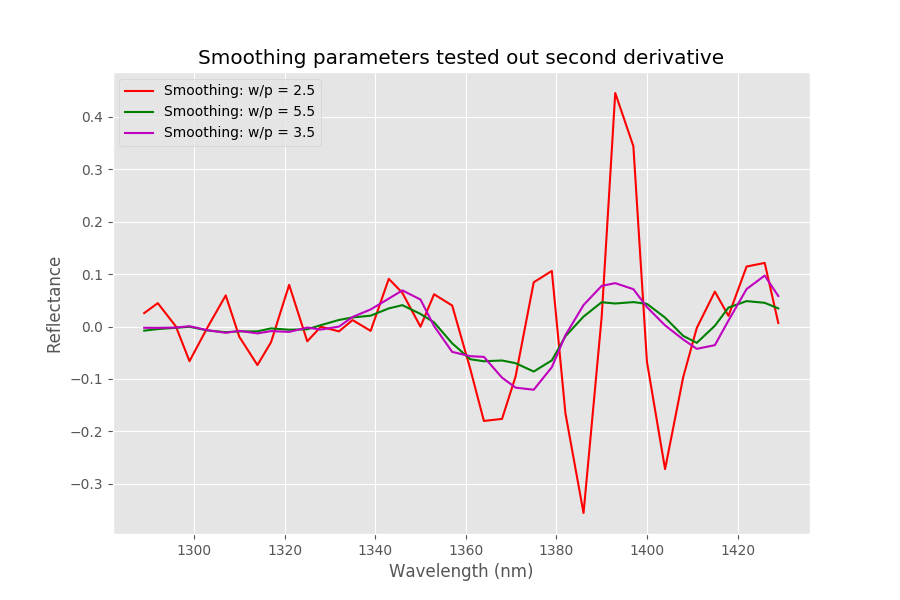

In [112]:
w = 5
p = 2
film=(57, 44)
x, y= film
interval = np.arange(100,140,1)
X_original = X[image_used, y, x, :]
X_smooth_1 = savgol_filter(X_original, w, polyorder = p, deriv=2)
X_smooth_2 = savgol_filter(X_original, 2*w+1, polyorder = p, deriv=2)
X_smooth_3 = savgol_filter(X_original, 4*w+1, polyorder = 3*p, deriv=2)

plt.figure(figsize=(9,6))
plt.title("Smoothing parameters tested out second derivative")
plt.plot(index[interval], X_smooth_1[interval], 'r', label = 'Smoothing: w/p = 2.5')
plt.plot(index[interval], X_smooth_2[interval], 'g', label = 'Smoothing: w/p = 5.5')
plt.plot(index[interval], X_smooth_3[interval], 'm', label = 'Smoothing: w/p = 3.5')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend();

# Setting the optimal w, p values
w = 4*w+1
p = 3*p

The selected optimal values for w and p are 21 and 6 respectively

In [113]:
 w, p

(21, 6)

<IPython.core.display.Javascript object>


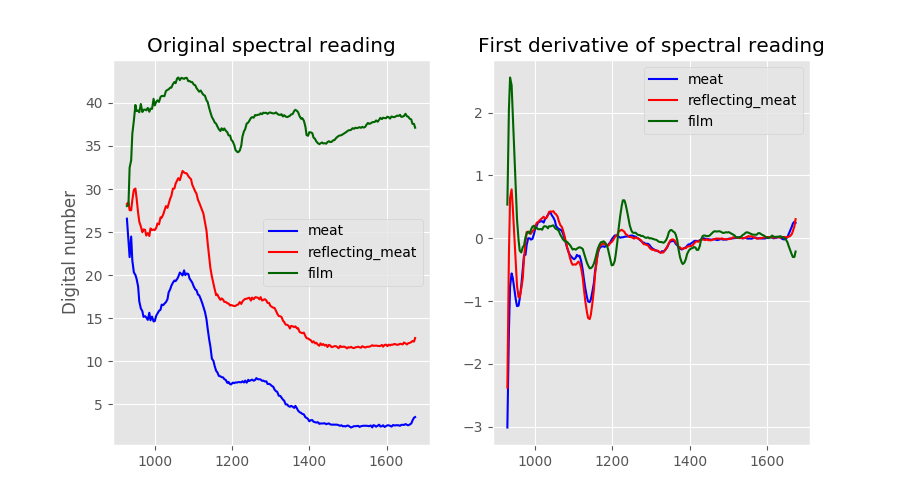

In [114]:
def plot_pixel_spectra(data, w, p, **points):
    colors = ['Blue', 'Red', 'DarkGreen', 'Black', 'Magenta', 'Cyan', 'Yellow', 'White', 'DarkBlue']
    
    plt.figure(figsize=(9, 5))
    ax_1 = plt.subplot(121)
    plt.title("Original spectral reading")
    plt.ylabel("Digital number")
    ax_2 = plt.subplot(122)
    plt.title("First derivative of spectral reading")
    
    items = points.keys()
    for i, item in enumerate(items):
        x, y = points[item]
        X = data[y, x, :]
        ax_1.plot(index, X, color=colors[i], label=item)
        
        X_smooth = savgol_filter(X, w, polyorder = p, deriv=1)
        ax_2.plot(index, X_smooth, color=colors[i], label=item)
    ax_1.legend()
    ax_2.legend()

plot_pixel_spectra(X[image_used], w, p, meat=(56, 76)
                              , reflecting_meat=(46, 52)
                              , film=(57, 44))

## And now PCA and LDA on the first derivative

In [124]:
def load_data(scale, test_ratio):
    X, Y, info = mypackage.Dataset.load("../data/tomra")
    X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=test_ratio)
    X_test, X_train = mypackage.Dataset.scale(X_test, X_train, scale=scale)
    return X_train, X_test, Y_train, Y_test

<IPython.core.display.Javascript object>


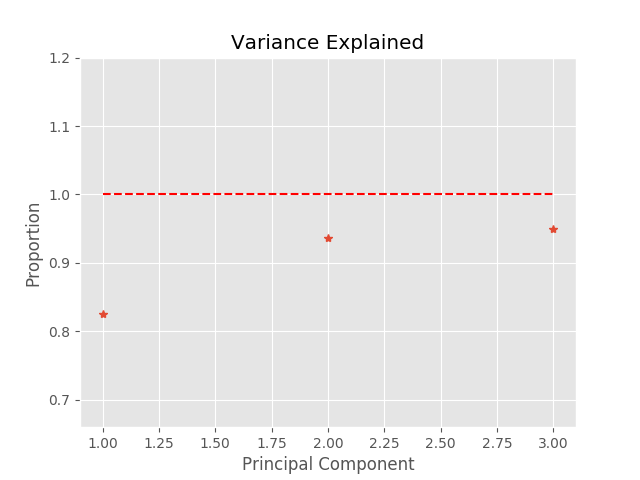

<IPython.core.display.Javascript object>


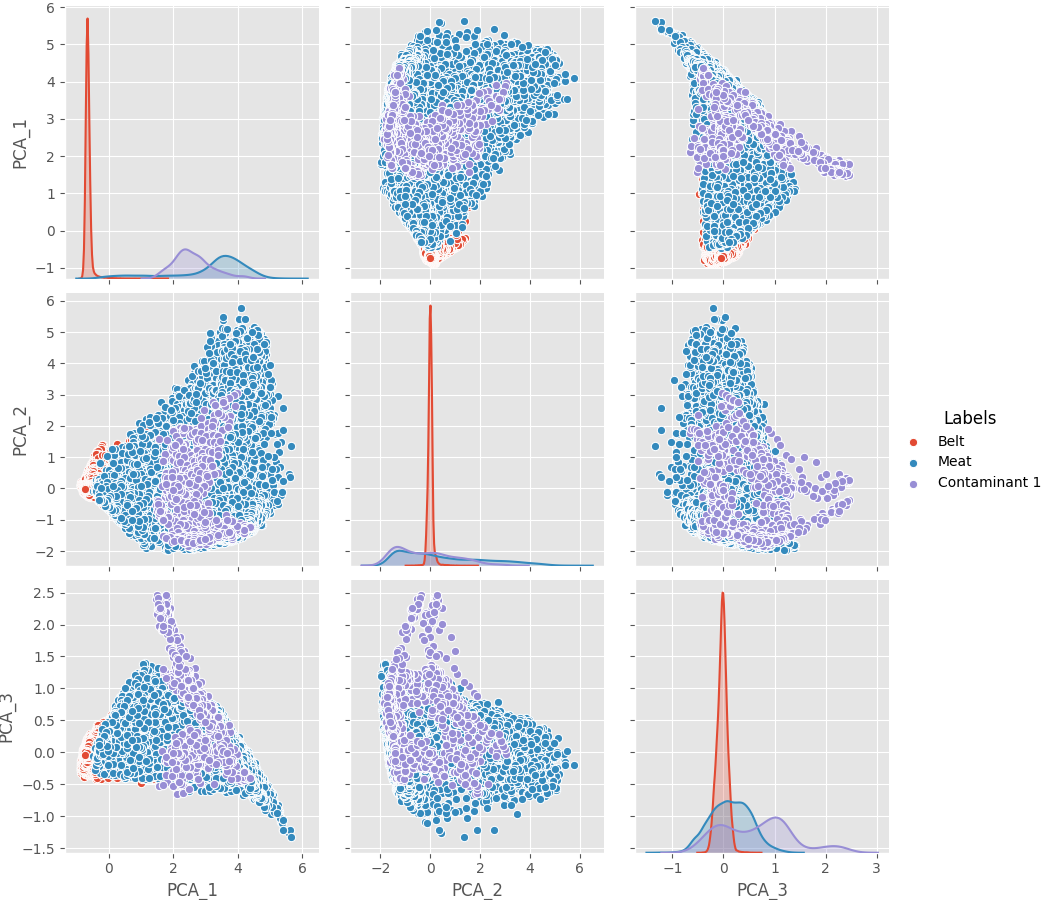

In [125]:
X_train, X_test, Y_train, Y_test = load_data(scale='1st_derivative', test_ratio=0.3)

_, X_pca = mypackage.Dataset.PCA(X_train[:, :, :, 10:-10], X_test[:, :, :, 10:-10], n_components=3, plot=True)

n_items, n, m, k = X_pca.shape
df = pd.DataFrame(X_pca.reshape((n_items*n*m, k)), columns=['PCA_1', 'PCA_2', 'PCA_3'])
df['Labels'] = Y_test.reshape((n_items*n*m, 1)).copy()
items = ['Belt', 'Meat', 'Contaminant 1', 'Contaminant 2', 'Contaminant 3', 'Contaminant 4']
for i, item in enumerate(items):
    df['Labels'][df['Labels'] == i+1] = item
sns.pairplot(df, hue='Labels', height=3)
plt.show()

(8, 100, 100, 2) (8, 100, 100, 1)


<IPython.core.display.Javascript object>


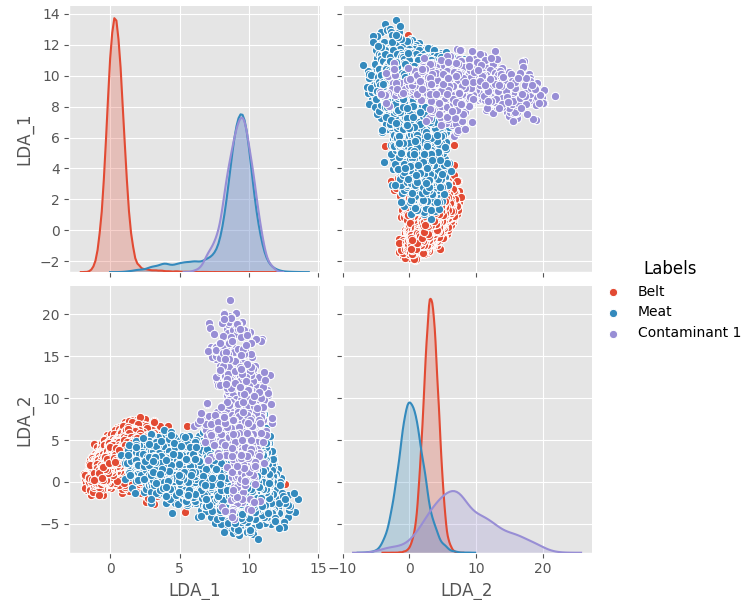

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, Y_train, Y_test = load_data(scale='1st_derivative', test_ratio=0.3)
n_components = 2
lda = LinearDiscriminantAnalysis(n_components=n_components)

train = mypackage.StackTransform(X_train, Y_train)
lda.fit(train.X_stack(), train.Y_stack().ravel())

test = mypackage.StackTransform(X_test)
X_lda = lda.transform(test.X_stack())
X_lda_unstacked = X_lda
X_lda = test.Unstack(X_lda, k=n_components)

print(X_lda.shape, Y_test.shape)

n_items, n, m, k = X_lda.shape
df = pd.DataFrame(X_lda.reshape((n_items*n*m, k)), columns=['LDA_1', 'LDA_2'])
df['Labels'] = Y_test.reshape((n_items*n*m, 1))
items = ['Belt', 'Meat', 'Contaminant 1', 'Contaminant 2', 'Contaminant 3', 'Contaminant 4']
for i, item in enumerate(items):
    df['Labels'][df['Labels'] == i+1] = item
sns.pairplot(df, hue='Labels', height=3)
plt.show()

In [120]:
X, Y, info = mypackage.Dataset.load("../data/tomra", only_one_contaminant_type=False)
_, X = mypackage.Dataset.scale(X_test=None, X_train=X, scale='1st_derivative')

<IPython.core.display.Javascript object>


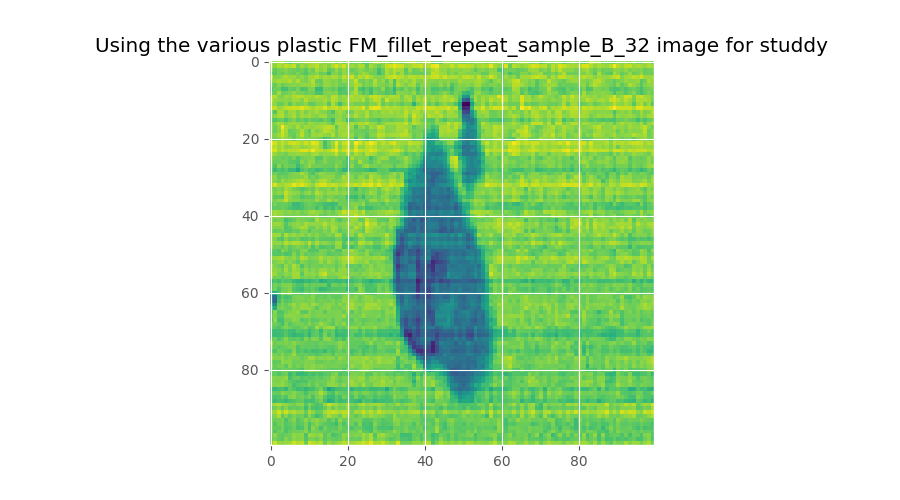

In [121]:
for idx, file_name in enumerate(info):
    if file_name == '20200213_120044_FM_fillet_repeat_sample_B_32':
        image_numb = idx
        
# (59, 67, 84)
band = 67 # index=6 is 950nm

plt.figure(figsize=(9, 5))
plt.title(f"Using the various plastic {info[image_numb][16:]} image for studdy")
plt.imshow(np.squeeze(X[image_numb, :, :, band]));

if image_numb != 0:
    raise ValueError("Was expecting the image at index 0")
else:
    X_train, Y_train = X[1:, :, :, :] , Y[1:, :, :, :]
    X_test , Y_test  = X[0:1, :, :, :], Y[0:1, :, :, :]

<IPython.core.display.Javascript object>


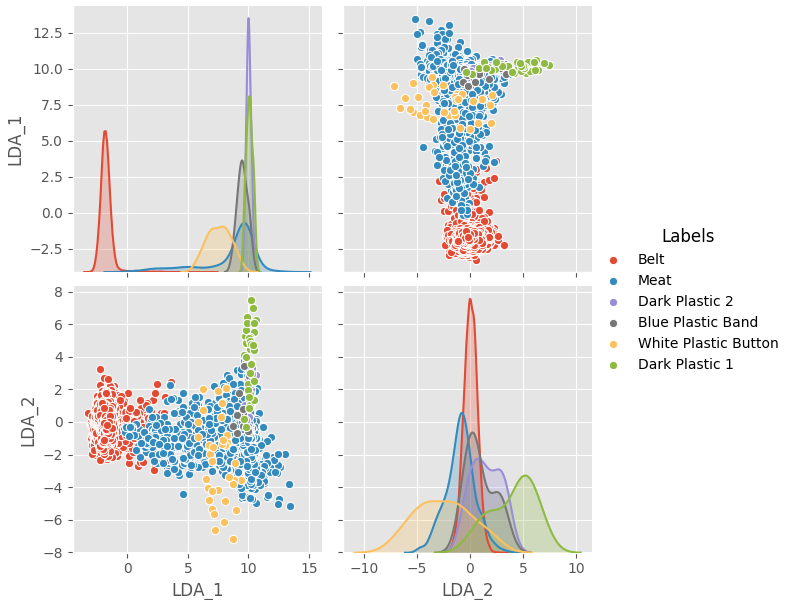

In [122]:
n_components = 2
lda = LinearDiscriminantAnalysis(n_components=n_components)
    
train = mypackage.StackTransform(X_train, Y_train)
lda.fit(train.X_stack(), train.Y_stack().ravel())

test = mypackage.StackTransform(X_test)
X_lda = lda.transform(test.X_stack())
X_lda_unstacked = X_lda
X_lda = test.Unstack(X_lda, k=n_components)

n_items, n, m, k = X_lda.shape
df = pd.DataFrame(X_lda.reshape((n_items*n*m, k)), columns=['LDA_1', 'LDA_2'])
df['Labels'] = Y_test.reshape((n_items*n*m, 1))
items = ['Belt', 'Meat', 'White Plastic Button', 'Dark Plastic 1', 'Dark Plastic 2', 'Blue Plastic Band']
for i, item in enumerate(items):
    df['Labels'][df['Labels'] == i+1] = item
sns.pairplot(df, hue='Labels', height=3)
plt.show()

<IPython.core.display.Javascript object>


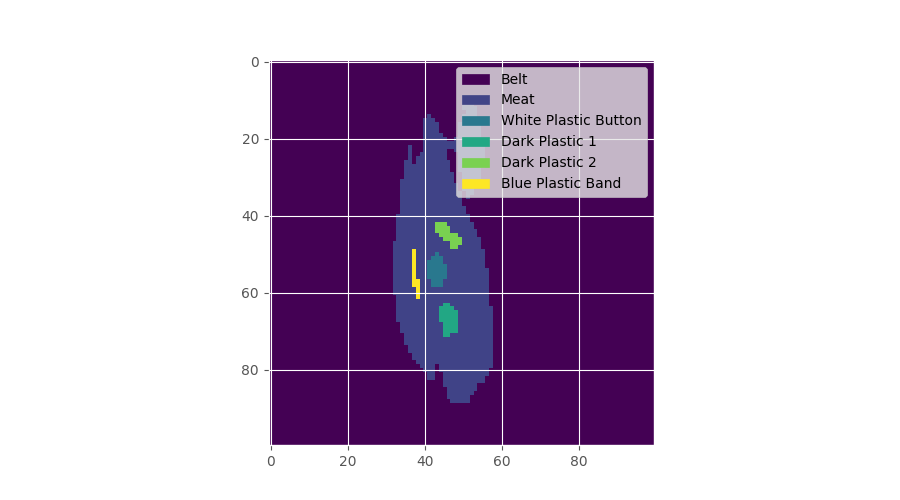

In [123]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

a = np.squeeze(Y_test)

plt.figure(figsize=(9, 5))
im = plt.imshow(a)

# https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
values = np.unique(a)
colors = [ im.cmap(im.norm(value)) for value in values]
items = ['Belt', 'Meat', 'White Plastic Button', 'Dark Plastic 1', 'Dark Plastic 2', 'Blue Plastic Band']
patches = [ mpatches.Patch(color=colors[i-1], label=f"{items[i-1]}") for i in values ]
plt.legend(handles=patches)